## Lunar Starship analysis!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

$\Delta v_T=\Delta v$ from LEO to lunar surface (5930 m/s),

$\Delta v_F=\Delta v$ from lunar surface to LEO (2740 m/s),

$P=$ lunar Starship propellant capacity (1200T),

$m_F=$ payload (in metric tons) lunar Starship can bring from the Moon,

$m_T=$ payload (in metric tons) lunar Starship can take to the Moon,

$M=$ dry mass of lunar Starship; ranges b/w 80T & 120T inclusive :) 

$v_e=$ SpaceX's Raptor Vacuum engine (RVac) exhaust velocity $=I_{sp}g=$ 3724 m/s,

$T=\frac{\Delta v_T}{v_e}$

$F=\frac{\Delta v_F}{v_e}$

$\phi=1-e^T$

$\lambda=e^T(e^F-1)$

$k=\frac{\phi}{\lambda}$

$c=\frac{P}{\lambda}+M(k-1)$

and the relation between $m_F$ and $m_T$ is $m_F=km_T+c$

In [2]:
P = 1200
ve = 3724
vT = 5930
vF = 2740
T = vT / ve
F = vF / ve
phi = 1 - np.exp(T)
lda = np.exp(T) * (np.exp(F) - 1)
k = phi / lda
mT = np.arange(120)
c = lambda M: P / lda + M * (k - 1) 
mF = lambda M: k * mT + c(M)

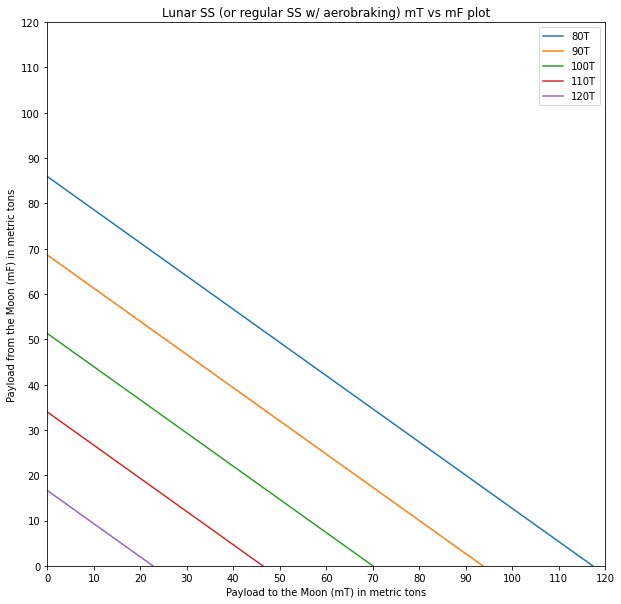

In [6]:
fig = plt.figure(figsize=(10, 10))
plt.title("Lunar SS (or regular SS w/ aerobraking) mT vs mF plot")
plt.xlabel("Payload to the Moon (mT) in metric tons")
plt.ylabel("Payload from the Moon (mF) in metric tons")
plt.xticks(np.arange(0, 130, 10))
plt.yticks(np.arange(0, 130, 10))
plt.xlim(0, 120)
plt.ylim(0, 120)
for M in range(80, 130, 10):
    plot = plt.plot(mT, mF(M), label=f"{M}T")
plt.legend(loc="upper right")
plt.show()